In [1]:
import pandas as pd
from zipfile import ZipFile
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer

In [2]:
zip_file_path = './playground-series-s3e25.zip'

with ZipFile(zip_file_path, 'r') as zip_file:
    csv_names = ['sample_submission.csv', 'train.csv', 'test.csv']

    dfs = {}

    for name in csv_names:
        with zip_file.open(name) as file:
            df = pd.read_csv(file, index_col='id')
        
        dfs[name] = df

In [3]:
sample_df = dfs['sample_submission.csv']
train_df = dfs['train.csv']
test_df = dfs['test.csv']

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 1.0 MB


In [5]:
train_df.sort_values(by='Hardness')

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
4727,394.0,147.252000,47.251424,3.739130,114.951853,10.961994,2.620009,1.782048,1.61584,0.450078,5.97378,1.0
3481,144.0,15.550000,24.000000,5.000000,53.490297,10.131440,2.295000,1.825000,1.12000,0.479965,3.78486,1.0
6880,68.0,13.350000,30.000000,4.000000,68.562730,10.629000,1.942500,1.875000,1.23750,0.490914,9.54775,1.3
1114,74.0,9.509324,24.666667,4.333333,53.356000,9.270800,2.440000,1.905000,1.12000,0.478570,4.56650,1.3
8253,74.0,14.220000,24.666667,4.000000,53.356000,9.270800,2.440000,1.923333,1.12000,0.478570,4.52755,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
83,6.0,1.700000,6.000000,4.000000,11.663548,11.702550,2.580000,1.495000,0.71000,0.499540,0.58543,10.0
4876,122.0,8.109328,12.500000,4.800000,24.789618,11.288000,2.738000,1.750000,0.96000,0.485020,1.77500,10.0
9728,32.0,1.700000,8.000000,4.000000,16.862138,11.260300,2.550000,1.700000,0.75000,0.499540,0.64150,10.0


array([[<Axes: title={'center': 'allelectrons_Total'}>,
        <Axes: title={'center': 'density_Total'}>,
        <Axes: title={'center': 'allelectrons_Average'}>],
       [<Axes: title={'center': 'val_e_Average'}>,
        <Axes: title={'center': 'atomicweight_Average'}>,
        <Axes: title={'center': 'ionenergy_Average'}>],
       [<Axes: title={'center': 'el_neg_chi_Average'}>,
        <Axes: title={'center': 'R_vdw_element_Average'}>,
        <Axes: title={'center': 'R_cov_element_Average'}>],
       [<Axes: title={'center': 'zaratio_Average'}>,
        <Axes: title={'center': 'density_Average'}>,
        <Axes: title={'center': 'Hardness'}>]], dtype=object)

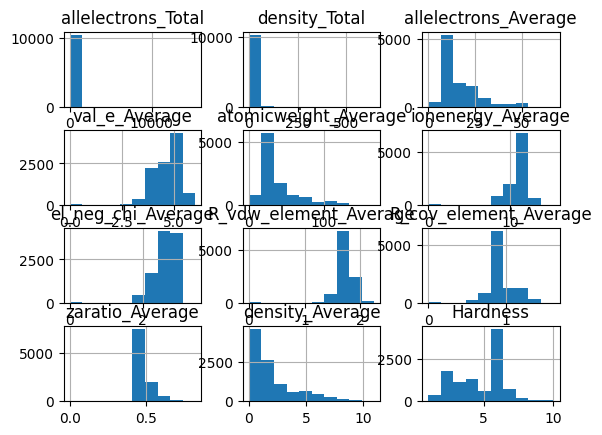

In [6]:
train_df.hist()

In [7]:
train_df['Hardness'].value_counts()

Hardness
6.00     2063
5.50     1463
2.50     1089
3.80      712
5.80      403
6.50      397
2.00      388
2.80      387
5.00      375
4.00      370
3.00      310
2.30      292
6.30      266
3.50      261
6.80      240
1.50      174
1.80      158
3.30      144
5.30      135
4.30      130
4.80      105
7.50       98
4.50       97
7.00       96
7.80       64
9.00       33
10.00      30
9.50       25
1.30       18
8.50       15
8.00       12
5.75       10
6.20       10
7.30       10
8.10        7
2.90        5
1.00        2
2.20        1
5.40        1
6.70        1
2.60        1
3.60        1
8.30        1
4.10        1
3.20        1
4.70        1
6.40        1
9.80        1
2.10        1
6.64        1
Name: count, dtype: int64

In [8]:
filtered_train_df = train_df[train_df['Hardness'].map(train_df['Hardness'].value_counts() >= 10)]

In [9]:
target = 'Hardness'

X = filtered_train_df.drop(target, axis=1)
y = filtered_train_df[target]

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

X_test = test_df

In [11]:
def log_transform(X):
    return np.log1p(X)

model = Pipeline([
    ('selectkbest', SelectKBest(score_func=f_regression, k=10)),
    ('log', FunctionTransformer(func=log_transform, validate=False)),
    ('scaler', StandardScaler()),
    ('regression', GradientBoostingRegressor())
])

model.fit(X_train, y_train)

Pipeline(steps=[('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x0000019A4F4F0C20>)),
                ('log',
                 FunctionTransformer(func=<function log_transform at 0x0000019A5065A660>)),
                ('scaler', StandardScaler()),
                ('regression', GradientBoostingRegressor())])

In [12]:
print("Train MedAE: ", median_absolute_error(y_train, model.predict(X_train)))
print("Validation MedAE: ", median_absolute_error(y_val, model.predict(X_val)))

Train MedAE:  0.6890416429985669
Validation MedAE:  0.7211213037757034


In [20]:
test_df

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
id,,,,,,,,,,,
10407,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
10408,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
10409,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
10410,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
10411,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...
17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425


In [16]:
predictions = model.predict(test_df)

In [25]:
pred_df = pd.DataFrame({"Predictions": predictions}, index=test_df.index)
pred_df

,Predictions
id,
10407,2.934364
10408,3.021122
10409,5.555029
10410,4.531051
10411,5.398987
...,...
17341,5.675970
17342,3.980538
17343,5.281875


In [19]:
pred_df.to_csv("mohs_pred.csv")